In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [ ]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabaties_dataset = load_diabetes()
print(diabaties_dataset)
print()
print(diabaties_dataset["DESCR"])

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [ ]:
diabaties_dataset.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
# Save the input and target variables
data = diabaties_dataset['data']
target = diabaties_dataset['target']
print(data.shape)
print(target.shape)


(442, 10)
(442,)


In [ ]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
import numpy as np
# Normalise the target data (this will make clearer training curves)
target = (target - np.mean(target))/np.std(target)
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.1 )
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [ ]:
X_train.shape[1]

10

In [ ]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1,activation='linear')
    ])
    return model
model = get_model()

In [ ]:
# Print the model summary

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [ ]:
# Compile the model

model.compile(optimizer='adam',loss='mse', metrics=['mae'])

In [ ]:
# Train the model, with some of the data reserved for validation
history = model.fit(X_train,Y_train,validation_split=0.15,epochs=100,verbose=2,batch_size=64)


Epoch 1/100
6/6 - 1s - loss: 0.9703 - mae: 0.8317 - val_loss: 0.9628 - val_mae: 0.8657
Epoch 2/100
6/6 - 0s - loss: 0.8883 - mae: 0.7995 - val_loss: 0.8060 - val_mae: 0.7908
Epoch 3/100
6/6 - 0s - loss: 0.7061 - mae: 0.7094 - val_loss: 0.5732 - val_mae: 0.6394
Epoch 4/100
6/6 - 0s - loss: 0.5950 - mae: 0.6353 - val_loss: 0.4724 - val_mae: 0.5432
Epoch 5/100
6/6 - 0s - loss: 0.5593 - mae: 0.6046 - val_loss: 0.4858 - val_mae: 0.5779
Epoch 6/100
6/6 - 0s - loss: 0.5447 - mae: 0.5873 - val_loss: 0.4570 - val_mae: 0.5688
Epoch 7/100
6/6 - 0s - loss: 0.4995 - mae: 0.5700 - val_loss: 0.4160 - val_mae: 0.5399
Epoch 8/100
6/6 - 0s - loss: 0.5190 - mae: 0.5790 - val_loss: 0.4171 - val_mae: 0.5312
Epoch 9/100
6/6 - 0s - loss: 0.4955 - mae: 0.5549 - val_loss: 0.4328 - val_mae: 0.5593
Epoch 10/100
6/6 - 0s - loss: 0.4856 - mae: 0.5710 - val_loss: 0.4225 - val_mae: 0.5529
Epoch 11/100
6/6 - 0s - loss: 0.4624 - mae: 0.5413 - val_loss: 0.4013 - val_mae: 0.5299
Epoch 12/100
6/6 - 0s - loss: 0.4589 - ma

In [ ]:
# Evaluate the model on the test set
loss,mae = model.evaluate(X_test,Y_test)


2/2 [==============================] - 0s 4ms/step - loss: 0.7276 - mae: 0.6482


#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

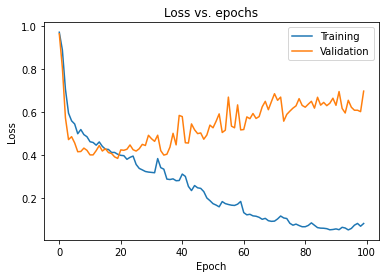

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# **Clearly above model is overfitting**

***
<a id="coding_tutorial_2"></a>
## Model regularisation

**Penalising the weight parameters**

**weight matrix is called kernel**

**Regularization can be applied to both weight matrix and bias.**

**We can apply both regularization l1 and l2 together**

**In Training only Dropout is used while in Testing Dropout layer is ignored.**

#### Adding regularisation with weight decay and dropout

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
def get_regularised_model(wd,wr, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=wr,l2=wd),),        #l2 and l1 using together
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [ ]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(0.01,0.002,0.05)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)              

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train, Y_train, validation_split=0.20, epochs=100, batch_size=2**7, verbose=False )

In [ ]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test,Y_test, verbose=2)


2/2 - 0s - loss: 0.6818 - mae: 0.5401


#### Plot the learning curves

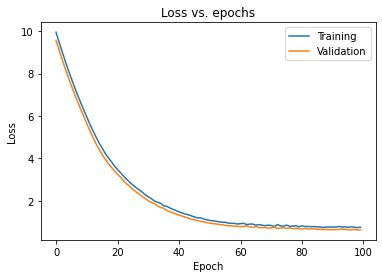

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

**model.fit() returns history object which is nothing but callback.**

**tf.keras.callbacks.Callback**

***Abstract base class used to build new callbacks.***

# Module: tf.keras.callbacks

**Classes**

class BaseLogger: Callback that accumulates epoch averages of metrics.

class CSVLogger: Callback that streams epoch results to a CSV file.

**class Callback: Abstract base class used to build new callbacks.**

class CallbackList: Container abstracting a list of callbacks.

class EarlyStopping: Stop training when a monitored metric has stopped improving.

class History: Callback that records events into a History object.

class LambdaCallback: Callback for creating simple, custom callbacks on-the-fly.

class LearningRateScheduler: Learning rate scheduler.

class ModelCheckpoint: Callback to save the Keras model or model weights at some frequency.

class ProgbarLogger: Callback that prints metrics to stdout.

class ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.

class RemoteMonitor: Callback used to stream events to a server.

class TensorBoard: Enable visualizations for TensorBoard.

class TerminateOnNaN: Callback that terminates training when a NaN loss is encountered.

**All above class inherits from Callback Class**

#### Example training callback

In [ ]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback



class myCustomTrainingCallBack(Callback):
    
    def on_train_begin(self, logs= None):   # Do Something When training begin
        print("Training Begin!! ")
        
    def on_train_batch_begin(self, batch, logs=None):  #Do Something at the start of every batch iteration
        print(f"Training Batch {batch} Begin")
    
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training Batch {batch} Ended")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Epoch #{epoch} Begin" )
        
    def on_epoch_end(self, epoch, logs=None): # do something at the end of every epoch
        print(f"Epoch #{epoch} End")
        
    def on_train_end(self,logs=None):
        print("Training Ended")
        
        
class myCustomTestingCallBack(Callback):
    
    def on_test_begin(self, logs= None):
        print("Testing Begin!! ")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Batch {batch} Begin")
    
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Batch {batch} Ended")
        
        
    def on_test_end(self,logs=None):
        print("Testing Ended")
        

class myCustomPredictionCallBack(Callback):
    
    def on_predict_begin(self, logs= None):
        print("Prediction Begin!! ")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction Batch {batch} Begin")
    
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Predicton Batch {batch} Ended")
        
        
    def on_predict_end(self,logs=None):
        print("Precition Ended")

In [ ]:
# Re-build the model

model = get_regularised_model(1e-5,0.05, 0.3)


In [ ]:
# Compile the model
model.compile(optimizer='Adam', loss='mse')

#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train,Y_train, epochs=5, batch_size=128, validation_split=0.1, callbacks=[myCustomTrainingCallBack()], verbose=0)

Training Begin!! 
Epoch #0 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #0 End
Epoch #1 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #1 End
Epoch #2 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #2 End
Epoch #3 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #3 End
Epoch #4 Begin
Training Batch 0 Begin
Training Batch 0 Ended
Training Batch 1 Begin
Training Batch 1 Ended
Training Batch 2 Begin
Training Batch 2 Ended
Epoch #4 End
Training Ended


In [ ]:
# Evaluate the model

model.evaluate(X_test, Y_test, verbose=False, callbacks=[myCustomTestingCallBack()] )

Testing Begin!! 
Testing Batch 0 Begin
Testing Batch 0 Ended
Testing Batch 1 Begin
Testing Batch 1 Ended
Testing Ended


52.03736877441406

In [ ]:
# Make predictions with the model

model.predict(X_test, verbose=False, callbacks=[myCustomPredictionCallBack()])

Prediction Begin!! 
Prediction Batch 0 Begin
Predicton Batch 0 Ended
Prediction Batch 1 Begin
Predicton Batch 1 Ended
Precition Ended


array([[-0.05448955],
       [-0.05065741],
       [ 0.07928049],
       [-0.06011778],
       [-0.01831592],
       [ 0.22229075],
       [ 0.07796389],
       [ 0.12201186],
       [ 0.17397101],
       [-0.06425836],
       [-0.02513882],
       [-0.04205555],
       [-0.0583671 ],
       [-0.04603202],
       [-0.05035132],
       [ 0.12638962],
       [ 0.19649774],
       [ 0.10063945],
       [-0.01323096],
       [ 0.20544352],
       [-0.03808918],
       [ 0.17664562],
       [-0.06066424],
       [-0.06160249],
       [ 0.01590403],
       [ 0.00084102],
       [ 0.28087738],
       [-0.03984156],
       [ 0.21983209],
       [-0.04614639],
       [ 0.05708956],
       [-0.06328782],
       [-0.05620201],
       [ 0.20128065],
       [ 0.16749078],
       [ 0.15903649],
       [ 0.13156645],
       [ 0.13753822],
       [-0.04995927],
       [ 0.15128762],
       [-0.05034412],
       [ 0.05827858],
       [-0.0561452 ],
       [ 0.11475283],
       [ 0.19826585]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model
unreg_model = get_model()
unreg_model.compile(optimizer='adam', loss='mse')
unreg_hist = unreg_model.fit(X_train,Y_train, epochs=100,
                             verbose=False,validation_split=0.2,
                             callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)] )


In [ ]:
# Evaluate the model on the test set
unreg_model.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 4ms/step - loss: 0.5341


0.5341193675994873

In [ ]:
# Re-train the regularised model
regularized_model = get_regularised_model(1e-8,0.02,0.01)
regularized_model.compile(optimizer='adam', loss='mse')
regularized_hist = regularized_model.fit(X_train,Y_train, epochs=100,
                                         verbose=False,validation_split=0.2,
                                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)] )


In [ ]:
# Evaluate the model on the test set

regularized_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6819


0.681877613067627

#### Plot the learning curves

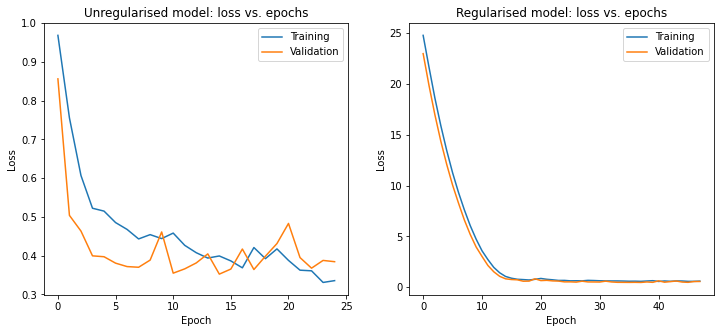

In [ ]:

# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_hist.history['loss'])
plt.plot(unreg_hist.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularized_hist.history['loss'])
plt.plot(regularized_hist.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()